In [2]:
!pip install dmol-book

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 22.5 MB/s 
     |████████████████████████████████| 3.2 MB 25.4 MB/s 
     |████████████████████████████████| 6.6 MB 56.0 MB/s 
     |████████████████████████████████| 84 kB 1.0 MB/s 
     |████████████████████████████████| 117 kB 33.4 MB/s 
     |████████████████████████████████| 29.3 MB 14.9 MB/s 
     |████████████████████████████████| 128 kB 75.2 MB/s 
     |████████████████████████████████| 250 kB 66.9 MB/s 
     |████████████████████████████████| 47 kB 4.2 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 352 kB 66.0 MB/s 
     |████████████████████████████████| 154 kB 66.1 MB/s 
     |████████████████████████████████| 57 kB 5.3 MB/s 
     |████████████████████████████████| 94 kB 2.4 MB/s 
     |████████████████████████████████| 87 kB 7.5 MB/s 
     |████████████████████████████████| 56

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
import jax
import dmol
#import seaborn as sns
import rdkit, rdkit.Chem, rdkit.Chem.Draw
import tensorflow as tf
import urllib




In [109]:
xvalues = np.linspace(-20,20, 100000)
yvalues=[]
for i in range(len(xvalues)):
  yvalues.append(xvalues[i]*2 + 4)
yvalues = np.array(yvalues)

In [110]:
yvalues

array([-36.        , -35.99919999, -35.99839998, ...,  43.99839998,
        43.99919999,  44.        ])

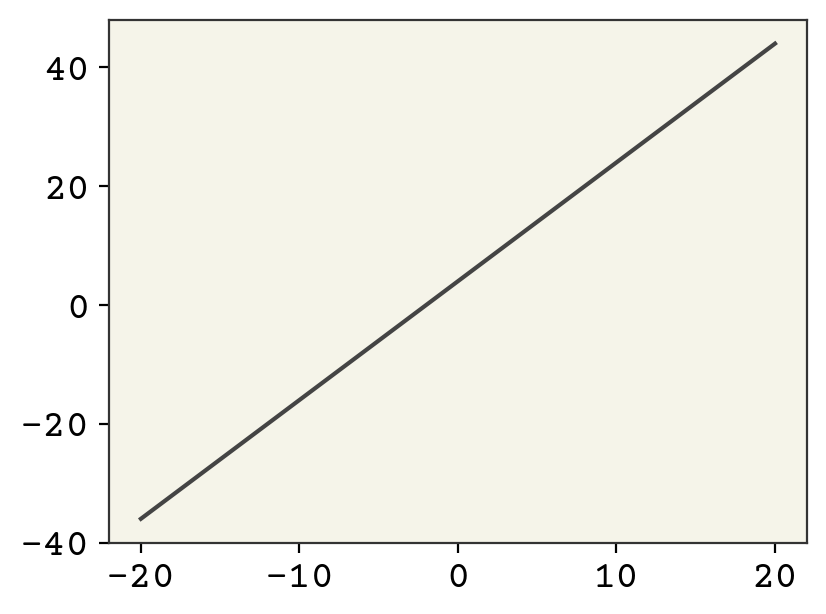

In [111]:
plt.plot(xvalues, yvalues)

In [112]:
## Preparing data

data = tf.data.Dataset.from_tensor_slices((xvalues, yvalues))

data = data.shuffle(100000, seed=1)
test_data = data.take(10000).shuffle(200, seed=1)
val_data = data.skip(10000).take(10000).shuffle(200, seed=1)
train_data = data.skip(20000).shuffle(200, seed=1)


In [127]:
##Model
model = tf.keras.Sequential()

model.add(tf.keras.layers.MaxPooling1D(input_dim=1,pool_size=4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.summary()


ValueError: ignored

In [116]:
model.compile("SGD", loss="mean_absolute_error")
#model.optimizer.lr = 0.01
result = model.fit(train_data.batch(10), validation_data=val_data.batch(10), epochs=8)


Epoch 1/8
8000/8000 [==============================] - 11s 1ms/step - loss: 19.6843 - val_loss: 19.8357
Epoch 2/8
8000/8000 [==============================] - 11s 1ms/step - loss: 19.6712 - val_loss: 19.6552
Epoch 3/8
8000/8000 [==============================] - 11s 1ms/step - loss: 19.6652 - val_loss: 19.6311
Epoch 4/8
8000/8000 [==============================] - 11s 1ms/step - loss: 19.6311 - val_loss: 19.5111
Epoch 5/8
8000/8000 [==============================] - 11s 1ms/step - loss: 19.6650 - val_loss: 19.7626
Epoch 6/8
8000/8000 [==============================] - 12s 1ms/step - loss: 19.6724 - val_loss: 19.8397
Epoch 7/8
8000/8000 [==============================] - 11s 1ms/step - loss: 19.6684 - val_loss: 19.2869
Epoch 8/8
8000/8000 [==============================] - 11s 1ms/step - loss: 19.6370 - val_loss: 19.6821


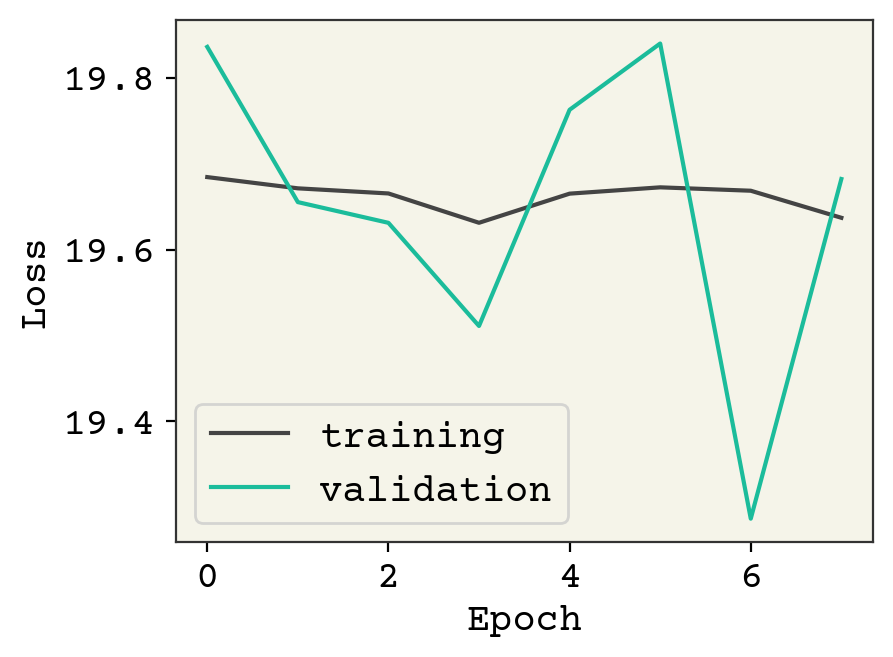

In [117]:
plt.plot(result.history["loss"], label="training")
plt.plot(result.history["val_loss"], label="validation")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [119]:
testx = [x for x,y in test_data]
yhat = model.predict(testx, verbose=0)
test_y = [y for x, y in test_data]
plt.figure()
plt.plot(test_y, test_y, "-")
plt.plot(test_y, yhat, ".")
plt.text(
    min(test_y) + 1,
    max(test_y) - 2,
    f"correlation = {np.corrcoef(test_y, yhat)[0,1]:.3f}",
)
plt.text(
    min(test_y) + 1,
    max(test_y) - 3,
    f"loss = {np.sqrt(np.mean((test_y - yhat)**2)):.3f}",
)
plt.title("Testing Data")
plt.show()

IndexError: ignored

In [121]:
testx[4]

<tf.Tensor: shape=(), dtype=float64, numpy=3.3902339023390233>